# Start

In [ ]:
import pandas as pd
import requests
import os

!pip install ydata-profiling
from ydata_profiling import ProfileReport

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import optimize

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=4218ab3cbedf652775cfc1484d5bfab0ff2b894e101269edd6b4892208ae48eb
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# Download files from github

# Define downloading function
def download_file(url, path):
    if os.path.exists(path):
        print(f"File {path} already exists. Skipping download.")
        return

    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful

    with open(path, 'wb') as file:
        file.write(response.content)

# Players JSON
p_url = "https://raw.githubusercontent.com/avtorgenii/Dota2-Predictor/master/players_dict.json"
download_file(p_url, "players.json")

# Matches JSON
m_url = "https://raw.githubusercontent.com/avtorgenii/Dota2-Predictor/master/matches_dict.json"
download_file(m_url, "matches.json")

# Combined data CSV
a_url = "https://raw.githubusercontent.com/avtorgenii/Dota2-Predictor/master/all_data.csv"
download_file(a_url, "all_data.csv")


In [ ]:
# Players data frame

df_players = pd.read_json("players.json")
df_players = df_players.T

display(df_players)

,MatchesAmount,Winrate,DivisionRank,Signatures
371374667,2986,0.613,280,"[rubick, mirana, earth-spirit]"
169808301,7907,0.558,433,"[magnus, bane, treant-protector]"
180011187,12685,0.527,112,"[juggernaut, bounty-hunter, spirit-breaker]"
121769650,4617,0.634,5001,"[rubick, io, shadow-demon]"
233861978,4569,0.533,125,"[morphling, monkey-king, alchemist]"
...,...,...,...,...
202346714,14964,0.515,280,"[dark-willow, phoenix, tiny]"
405148547,300,0.5,5001,[]
874981361,4349,0.547,260,"[morphling, slark, phantom-assassin]"
124306043,12749,0.512,503,"[morphling, invoker, void-spirit]"


In [ ]:
# Matches data frame

df_matches = pd.read_json("matches.json")
df_matches = df_matches.T

display(df_matches)


,Winner,Radiant,Dire,Version
2214-04-22 10:33:38,Dire,"[{'331855530': {'Hero': 'luna', 'Networth': 41...","[{'10366616': {'Hero': 'mirana', 'Networth': 1...",7.35
2214-04-13 06:24:57,Dire,"[{'292921272': {'Hero': 'magnus', 'Networth': ...","[{'10366616': {'Hero': 'venomancer', 'Networth...",7.35
2214-04-11 15:39:26,Dire,"[{'10366616': {'Hero': 'winter-wyvern', 'Netwo...","[{'292921272': {'Hero': 'magnus', 'Networth': ...",7.35
2214-04-10 06:16:21,Dire,"[{'292921272': {'Hero': 'mars', 'Networth': 49...","[{'10366616': {'Hero': 'venomancer', 'Networth...",7.35
2214-04-07 08:05:07,Radiant,"[{'124801257': {'Hero': 'weaver', 'Networth': ...","[{'331855530': {'Hero': 'luna', 'Networth': 43...",7.35
...,...,...,...,...
2202-03-08 15:46:33,Radiant,"[{'293731272': {'Hero': 'monkey-king', 'Networ...","[{'117421467': {'Hero': 'natures-prophet', 'Ne...",7.34
2202-03-06 08:38:50,Radiant,"[{'117421467': {'Hero': 'natures-prophet', 'Ne...","[{'107023378': {'Hero': 'treant-protector', 'N...",7.34
2202-03-04 13:49:43,Radiant,"[{'35504297': {'Hero': 'dark-willow', 'Networt...","[{'91460772': {'Hero': 'vengeful-spirit', 'Net...",7.34
2202-03-03 07:06:54,Dire,"[{'35504297': {'Hero': 'ogre-magi', 'Networth'...","[{'91460772': {'Hero': 'vengeful-spirit', 'Net...",7.34


In [ ]:
# Combined data ready for model training after scaling

df = pd.read_csv("all_data.csv")

display(df)

,Winner,Matches diff,Winrates diff,Counter picks winrate diff,Synergies winrates diff,Networthes diff,Signatures diff,R1 rank,R2 rank,R3 rank,R4 rank,R5 rank,D1 rank,D2 rank,D3 rank,D4 rank,D5 rank
0,0,-11333,-0.0084,0.03513,-0.00513,-1918,-1,141,156,15,15,100,19,29,1,6,153
1,0,8208,-0.0116,-0.01034,-0.01126,-1631,0,62,67,3,213,42,19,29,1,6,153
2,0,-8208,0.0116,0.04882,0.02032,3319,-1,19,29,1,6,153,62,67,213,3,42
3,0,8208,-0.0116,-0.06449,-0.00254,1815,1,62,67,213,3,42,19,29,1,6,153
4,1,-7181,0.0064,-0.00085,0.02585,1605,1,19,5,96,37,125,141,156,15,15,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,1,4252,0.0044,0.01940,-0.01633,4582,-1,27,122,39,12,255,52,63,66,16,158
2229,1,-4252,-0.0044,-0.00915,-0.01118,0,0,52,63,66,16,158,255,27,39,122,12
2230,1,-21646,0.0086,0.07434,0.00171,2294,-1,313,259,247,259,150,128,393,315,76,78
2231,0,-21646,0.0086,-0.00567,0.03282,526,0,313,259,247,259,150,128,393,315,76,78


# Data profiling



In [ ]:
# Removing player ranks columns for better readability of report, because rank of each individual player isn't informative for any other column
df_copy = df.drop(columns=["R1 rank",	"R2 rank",	"R3 rank",	"R4 rank",	"R5 rank",	"D1 rank",	"D2 rank",	"D3 rank", "D4 rank",	"D5 rank"])

profile = ProfileReport(df_copy, title="Matches DF report",)

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**From report we see that only Matches Diff, Winrates Diff and Networthes Diff have correlation with Winner side**

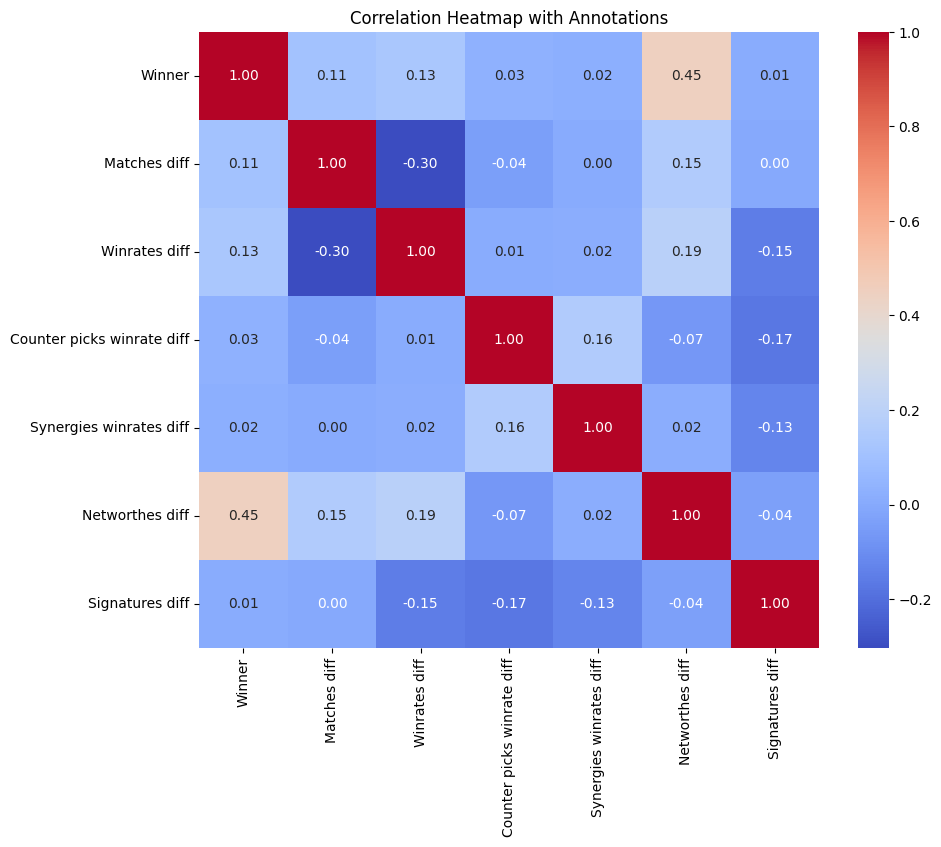

In [ ]:
# Dropping rows where networth diff is equal 0, meaning that there is no data for networth for this match
df = df[df["Networthes diff"] != 0]
df_copy = df.drop(columns=["R1 rank",	"R2 rank",	"R3 rank",	"R4 rank",	"R5 rank",	"D1 rank",	"D2 rank",	"D3 rank", "D4 rank",	"D5 rank"])


corr = df_copy.corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap with Annotations")
plt.show()

**As we see from this heatmap, Matches diff, Networthes diff, Winrates diff have the strongest correlations with Winner side**

**But for experiment we'll try to train model based on all initial data, because practically all other have a bit of correlation with Winner side too**

# Training SVM with all initial data

In [ ]:
# Splitting data

X = df.drop(columns=['Winner']).values
Y = df['Winner'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1674, 13) (559, 13) (1674,) (559,)


In [ ]:
# Transforming data

sc = StandardScaler()

sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

X_train_sc, X_test_sc

(array([[ 1.22010186, -1.09933393, -0.0943967 , ..., -0.38381043,
         -0.14778714, -0.12571957],
        [ 1.99311381,  1.44821617,  1.56787243, ..., -0.38543878,
          0.67135689,  9.0393624 ],
        [-2.48286545,  1.3274792 ,  1.78199124, ...,  0.59645967,
         -0.2173371 , -0.22973928],
        ...,
        [-1.61571124, -0.06099597, -1.66905391, ..., -0.40823576,
         -0.40022775, -0.12950211],
        [-0.56297213, -1.23214459,  0.9970199 , ..., -0.09559148,
         -0.40151571, -0.28836857],
        [-0.30197003,  1.56895314,  0.55463866, ..., -0.35287167,
         -0.36802869, -0.40373589]]),
 array([[ 0.41107576, -0.33869101, -0.61221062, ..., -0.06139601,
         -0.08467698, -0.29404237],
        [ 1.52923772,  0.4823204 ,  0.88544239, ...,  0.7202147 ,
          2.68830587,  0.09366745],
        [-0.40105203, -0.47150167,  0.84969045, ...,  0.7202147 ,
          2.68830587,  0.09366745],
        ...,
        [-1.61571124, -0.06099597, -0.38316243, ..., -

In [ ]:
# Fitting SVM based prediction model with basic parameters

clf = SVC(kernel='rbf')

clf.fit(X_train_sc, Y_train)
Y_pred = clf.predict(X_test_sc)

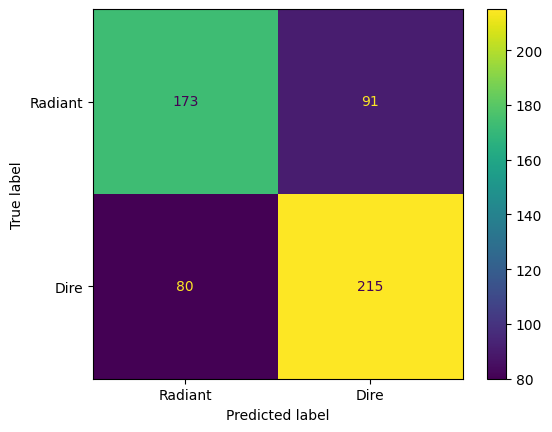

In [ ]:
# Plotting confusion matrix for predictions

cm = confusion_matrix(Y_test, Y_pred, labels=[clf.classes_])
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
   display_labels=["Radiant", "Dire"],
)
disp.plot()

plt.show()

In [ ]:
# Metrics for SVM

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)


accuracy, precision, recall, f1

(0.6940966010733453,
 0.7026143790849673,
 0.7288135593220338,
 0.7154742096505823)

In [ ]:
# Optimizing parameteres for SVM

def objective(x, X_train_sc, Y_train, X_test_sc):
  c, gamma = x

  # Clampling values to avoid errors during optimization
  c = max(0, c)
  gamma = max(0, gamma)

  clf = SVC(kernel='rbf', C=c, gamma=gamma)

  clf.fit(X_train_sc, Y_train)

  Y_pred = clf.predict(X_test_sc)

  return -accuracy_score(Y_test, Y_pred) # We have to maximize accuracy score, not minimize

# Repeat optimization for several times in order to find better params
for i in range(10):
  c_start = np.random.uniform(0.1, 1000)
  gamma_start = np.random.uniform(1e-4, 1)

  bounds = [(0, 1000), (1e-9, 10)]

  opt = optimize.minimize(objective, [c_start, gamma_start], args=(X_train_sc, Y_train, X_test_sc), method="COBYLA", bounds=bounds)

  print(f"C: {opt.x[0]} Gamma: {opt.x[1]} Accuracy: {-opt.fun}")

# Got accuracy = 0.7316 for C = 233.87 and gamma = 0.0009, I suspect that value of C can be still tweaked a bit

KeyboardInterrupt: 

In [ ]:
# Optimizing C param for SVM

# Brute force optimization for several times in order to find better params
gamma = 0.0009
cs = np.linspace(200, 400, 20)

results = []

for i in range(len(cs)):
  c = cs[i]

  clf = SVC(kernel='rbf', C=c, gamma=gamma)

  clf.fit(X_train_sc, Y_train)

  Y_pred = clf.predict(X_test_sc)

  results.append([c, gamma, accuracy_score(Y_test, Y_pred)])

sorted_results = sorted(results, key=lambda x: x[2], reverse=True)

print(sorted_results[0])

# And we've got same almost same value: then C = around 231 and gamma = 0.0009 are the best


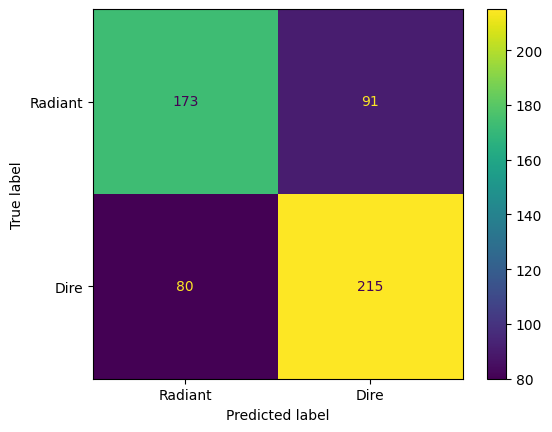

In [ ]:
# Plotting results for new params

cm = confusion_matrix(Y_test, Y_pred, labels=[clf.classes_])
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
   display_labels=["Radiant", "Dire"],
)
disp.plot()

plt.show()

# And the result of optimizing is 4% increase in accuracy

# Training SVM on different data column combinations


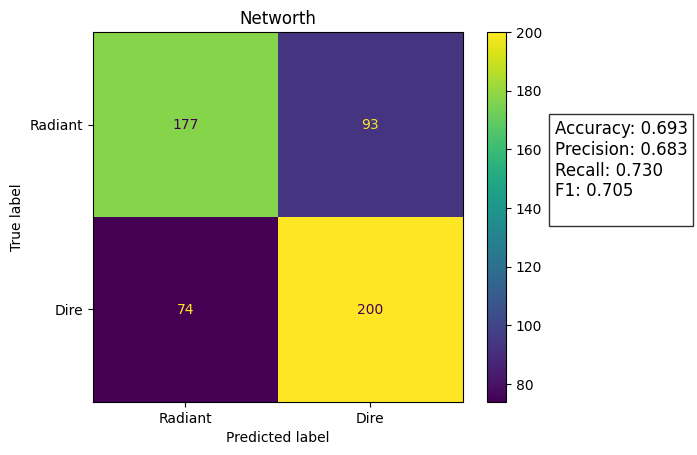

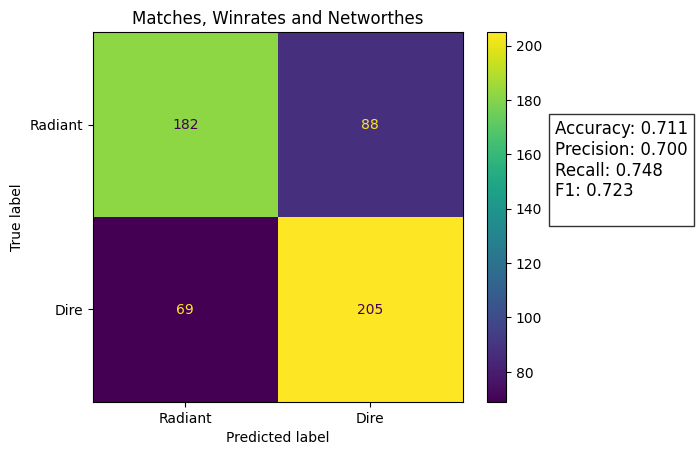

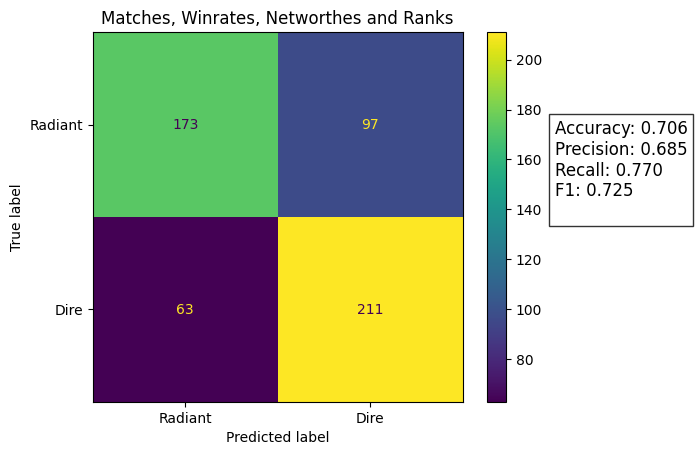

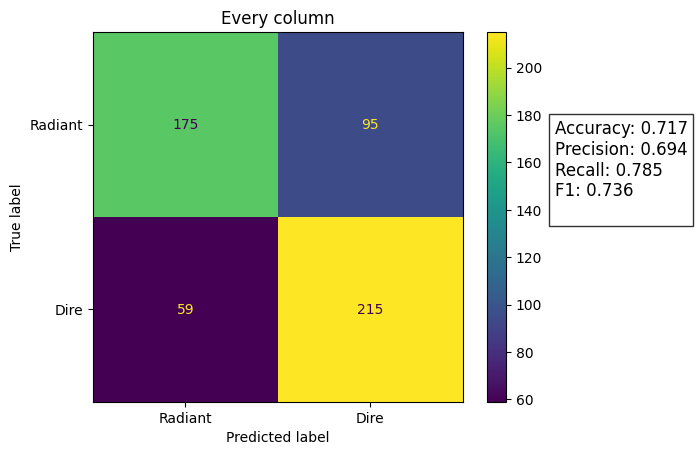

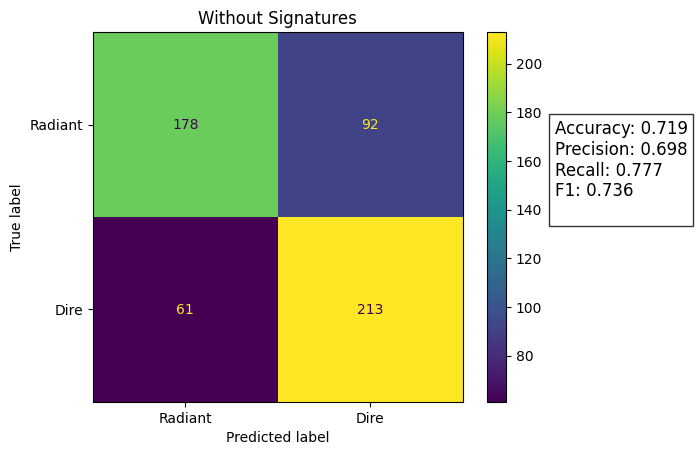

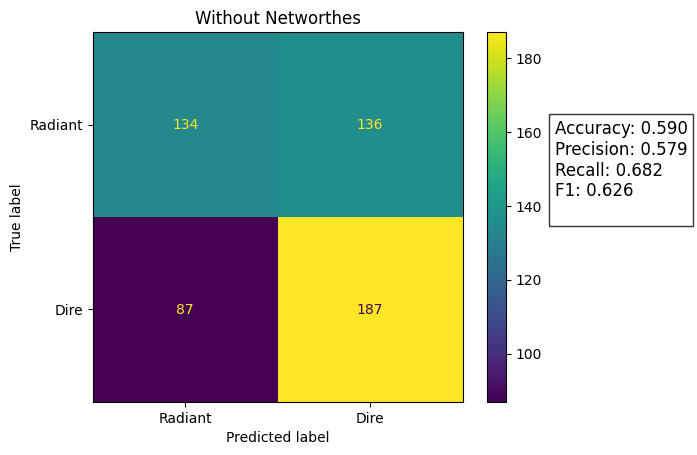

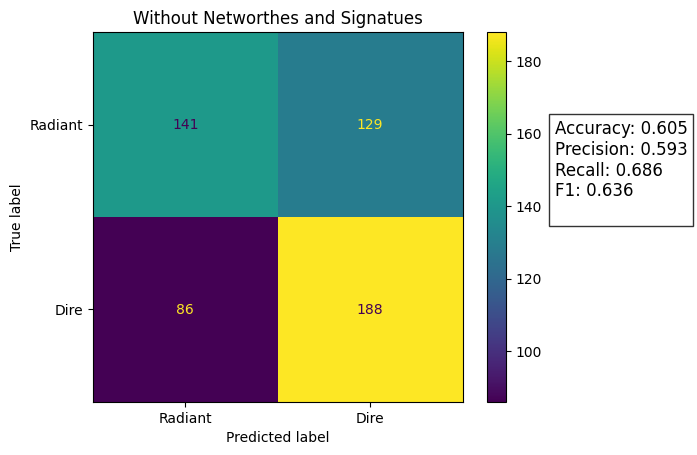

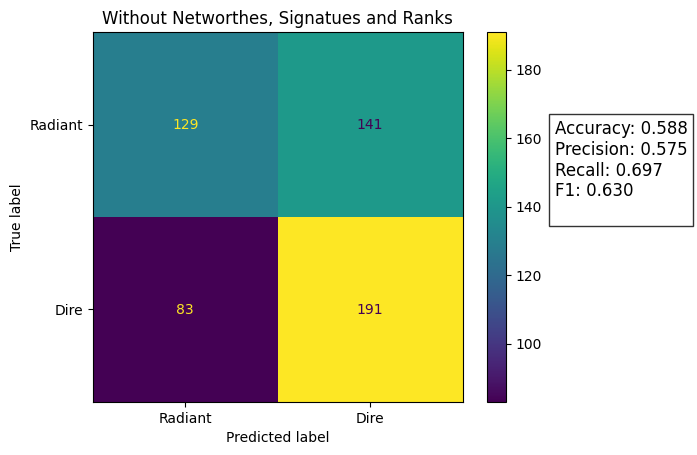

In [ ]:
# Splitting data

X0 = df['Networthes diff'].values.reshape(-1, 1)
X1 = df.drop(columns=['Winner', "Counter picks winrate diff",	"Synergies winrates diff", 'Signatures diff', "R1 rank", "R2 rank", "R3 rank", "R4 rank", "R5 rank",
    "D1 rank", "D2 rank", "D3 rank", "D4 rank", "D5 rank"]).values
X2 = df.drop(columns=['Winner', "Counter picks winrate diff",	"Synergies winrates diff", 'Signatures diff']).values
X3 = df.drop(columns=['Winner']).values
X4 = df.drop(columns=['Winner', 'Signatures diff']).values
X5 = df.drop(columns=['Winner', 'Networthes diff']).values
X6 = df.drop(columns=['Winner', 'Networthes diff', 'Signatures diff']).values
X7 = df.drop(columns=['Winner', 'Networthes diff', 'Signatures diff', "R1 rank", "R2 rank", "R3 rank", "R4 rank", "R5 rank",
    "D1 rank", "D2 rank", "D3 rank", "D4 rank", "D5 rank"]).values

Y = df['Winner'].values


for X, desc in zip([X0, X1, X2, X3, X4, X5, X6, X7],
 ["Networth","Matches, Winrates and Networthes", "Matches, Winrates, Networthes and Ranks", "Every column", "Without Signatures",
  "Without Networthes", "Without Networthes and Signatues", "Without Networthes, Signatues and Ranks"]):

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=511, shuffle=True)

  # Transforming data

  sc = StandardScaler()

  sc.fit(X_train)

  X_train_sc = sc.transform(X_train)
  X_test_sc = sc.transform(X_test)

  # Fitting SVM based prediction model with found parameters

  clf = SVC(kernel='rbf', C=231, gamma=0.0009)

  clf.fit(X_train_sc, Y_train)
  Y_pred = clf.predict(X_test_sc)


  # Plotting confusion matrix for predictions

  cm = confusion_matrix(Y_test, Y_pred, labels=[clf.classes_])
  disp = ConfusionMatrixDisplay(
      confusion_matrix=cm,
    display_labels=["Radiant", "Dire"],
  )
  disp.plot()

  # Metrics for SVM
  accuracy = accuracy_score(Y_test, Y_pred)
  precision = precision_score(Y_test, Y_pred)
  recall = recall_score(Y_test, Y_pred)
  f1 = f1_score(Y_test, Y_pred)

  plt.title(desc)
  plt.gca().text(2.0, 0.5, f"Accuracy: {accuracy:.3f}\nPrecision: {precision:.3f}\nRecall: {recall:.3f}\nF1: {f1:.3f}\n",
               bbox=dict(facecolor='white', alpha=0.8), fontsize=12, ha='left')


  plt.show()





**As we see, best results are obtained when we take into account only Winrates, Matches, Networthes and Ranks. Having a 73.2% of accuracy. But even though only theese columns showed correlation with Winner side, changing random state of train_test_split() may lead to results where consideration of all columns shows best result**

**Unfortunately without data about networth, predictions are less accurate by 12%**

**When making predictions based on data without networth, it is really better not to take into account data about signatures, as predictions with it are worse than without**

**Change of random state for data division on train and test samples, also lead to lower performance of model (~ -3% of accuracy), which means that in general correlation between input data and result of the match is very low, as the best result we can get without knowledge of networthes is 58.7%, which means that it is practically impossible to predict outcome of the match before 10th minute of game without deep analysis of team heroes picks**